In [ ]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

In [ ]:
data_frame = pd.read_csv('desharnais.csv', header=0)
data_frame.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [ ]:
# Delete projects 38, 44, 66, 75
print('----- Project 38 -----')
print(data_frame.loc[37])
print('-----------------------')
print('----- Project 44 -----')
print(data_frame.loc[43])
print('-----------------------')
print('----- Project 66 -----')
print(data_frame.loc[65])
print('-----------------------')
print('----- Project 75 -----')
print(data_frame.loc[74])
print('-----------------------')

data_frame = data_frame.drop([data_frame.index[37], data_frame.index[43], data_frame.index[65], data_frame.index[74]])

# store the final form of the data_frame
%store data_frame

print(data_frame.shape)

----- Project 38 -----
id                   38
Project              38
TeamExp              -1
ManagerExp           -1
YearEnd              87
Length                8
Effort             5922
Transactions        260
Entities            144
PointsNonAdjust     404
Adjustment           24
PointsAjust         360
Language              1
Name: 37, dtype: int64
-----------------------
----- Project 44 -----
id                    44
Project               44
TeamExp               -1
ManagerExp             4
YearEnd               86
Length                39
Effort             19894
Transactions         284
Entities             230
PointsNonAdjust      514
Adjustment            50
PointsAjust          591
Language               1
Name: 43, dtype: int64
-----------------------
----- Project 66 -----
id                   66
Project              66
TeamExp               2
ManagerExp           -1
YearEnd              87
Length               10
Effort             6783
Transactions        224
Entities

In [ ]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

core_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = data_frame[core_features]
Y = data_frame['Effort']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
from scipy.io import arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras.backend as K
from numpy.random import seed

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10,5)

# Scaling X data
scaler_x = StandardScaler()  

# fit only on training data
scaler_x.fit(X_train)  
X_train = scaler_x.transform(X_train)  

# apply same transformation to test data
X_test = scaler_x.transform(X_test)  

In [ ]:
print(X_test[:5])
print(Y_test[:5])

[[-0.98555126 -0.29865198 -0.2522284  -0.34101203 -0.39043814]
 [ 0.8708434   0.84197251  0.05922772  0.6934415   0.73721917]
 [ 1.44204176 -0.12465841 -0.18993718 -0.1771382  -0.24444679]
 [ 0.15684545  0.42954332 -0.77547469  0.02258302  0.0827752 ]
 [ 0.01404586 -0.35664984  0.81918067  0.05330936  0.37979208]]
4      2149
35     9135
10     4067
0      5152
47    12824
Name: Effort, dtype: int64


In [ ]:
# Scaling Y data

# reshape data
Y_train = Y_train.to_numpy().reshape(-1, 1)
Y_test = Y_test.to_numpy().reshape(-1, 1)

scaler_y = StandardScaler()  

# fit only on training data
scaler_y.fit(Y_train)  
Y_train = scaler_y.transform(Y_train)  

# apply same transformation to test data
Y_test = scaler_y.transform(Y_test) 

In [ ]:
print(Y_train[:5])
print(Y_test[:5])

[[-0.49444569]
 [-0.39919983]
 [-0.9172036 ]
 [ 0.30595368]
 [-0.13518501]]
[[-0.5596139 ]
 [ 1.10802402]
 [-0.10176541]
 [ 0.15723647]
 [ 1.98863042]]


Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
1/1 [==============================] - 0s 6ms/step - loss: 0.3695
Epoch 518/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.3700
Epoch 519/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3698
Epoch 520/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3706
Epoch 521/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3694
Epoch 522/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3689
Epoch 523/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.3706
Epoch 524/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3693
Epoch 525/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3689
Epoch 526/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.3686
Epoch 527/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3690
Epoch 528/1000
1/1 [============================

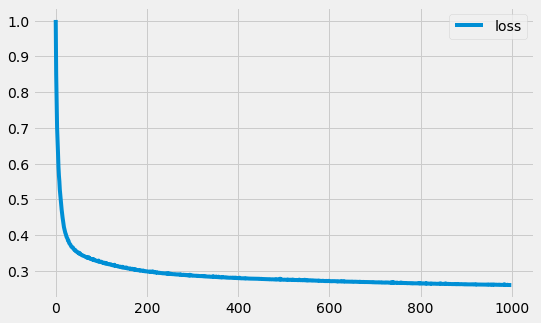

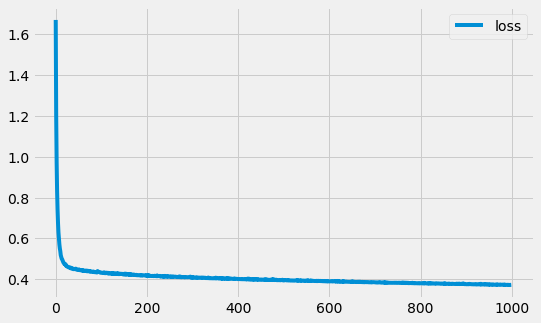

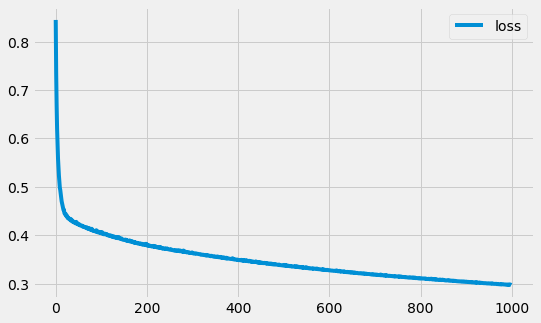

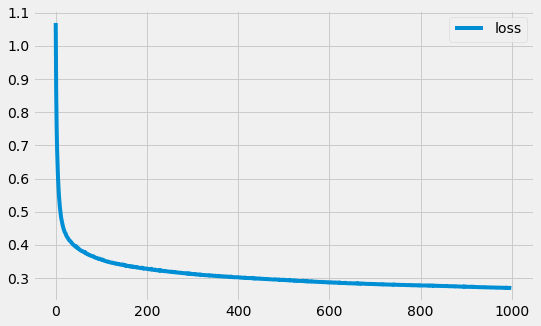

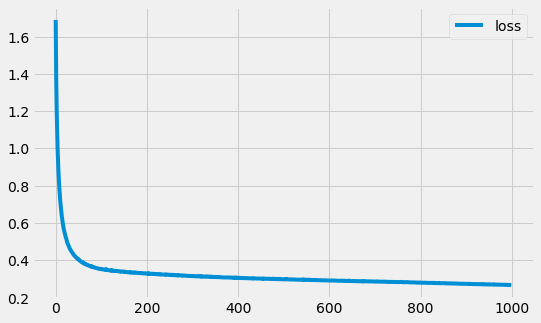

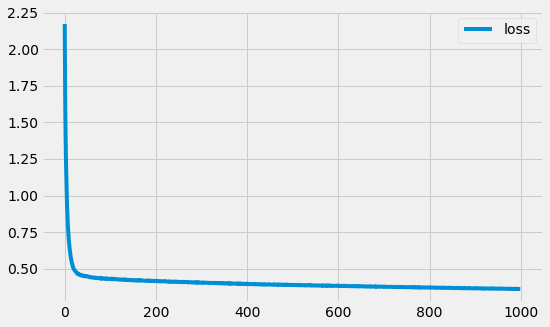

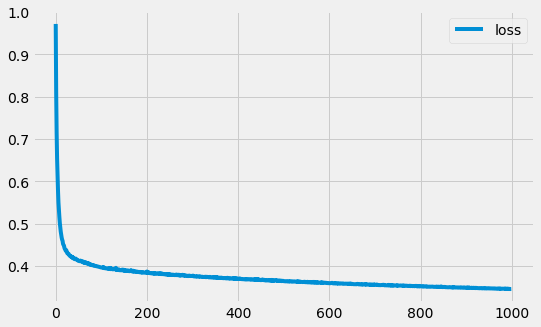

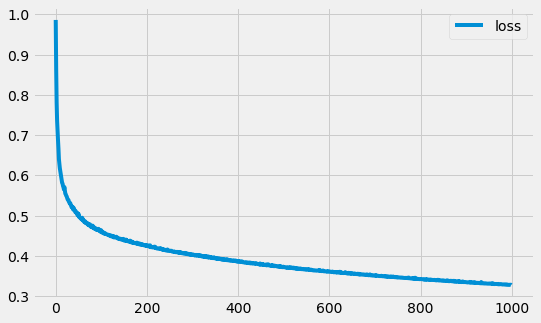

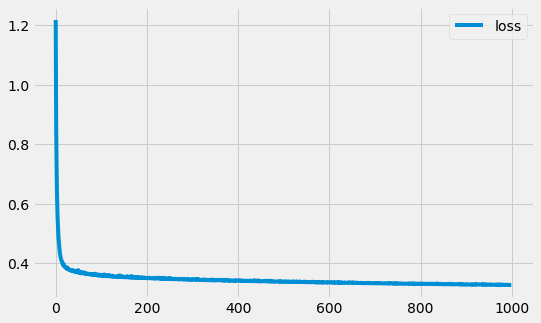

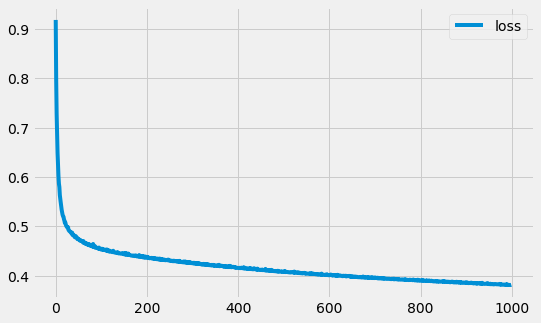

In [ ]:
from sklearn.model_selection import KFold
from numpy import savetxt

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
loss_per_fold = []
best_score = 99999

for train, test in kfold.split(inputs, targets):

    # Define the model architecture
    model = Sequential()
    model.add(Dense(16, input_shape=(5, ), activation='relu'))
    # output layer
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate = learning_rate), loss = loss_function)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} of {num_folds} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train], steps_per_epoch = STEPS_PER_EPOCH, epochs = NUMBER_OF_EPOCHS)
    
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.savefig("10-fold-losses/loss_fold_%s.png" % (fold_no))

    # Generate generalization metrics
    score = model.evaluate(inputs[test], targets[test], verbose=0)
    print("Score for fold %d: %s of %f" % (fold_no, model.metrics_names[0], score))
    loss_per_fold.append(score)
    
    if best_score > score:
        # the path and name of the model
        model.save("desharnais_fold_%d_loss_%f.hdf5" % (fold_no, score))
        best_score = score

        # save data distribution
        savetxt("x_train_fold_%s.csv" % (fold_no), inputs[train], delimiter=',')
        savetxt("y_train_fold_%s.csv" % (fold_no), targets[train], delimiter=',')
        savetxt("x_test_fold_%s.csv" % (fold_no), inputs[test], delimiter=',')
        savetxt("y_test_fold_%s.csv" % (fold_no), targets[test], delimiter=',')

        print("Saving model for fold %d ..." % (fold_no))

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(loss_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('desharnais_fold_6_loss_0.057849.hdf5')

X_train = np.genfromtxt('x_train_fold_6.csv', delimiter=',')
Y_train = np.genfromtxt('y_train_fold_6.csv', delimiter=',')
X_test = np.genfromtxt('x_test_fold_6.csv', delimiter=',')
Y_test = np.genfromtxt('y_test_fold_6.csv', delimiter=',')

loss = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = verbosity)

3/3 [==============================] - 0s 5ms/step - loss: 0.3604


In [ ]:
# Visualize loss for each iteration
import plotly.graph_objects as go
labels = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10']

fig = go.Figure(data=[
    go.Bar(name='Loss', x=labels, y=loss_per_fold)
])

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [3]:
# Visualize the accuracy changes over the 10 iterations

import plotly.graph_objects as go
import numpy as np

labels = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10']
x = np.arange(10)

fig = go.Figure(data=go.Scatter(x=labels, y=loss_per_fold))
fig.show()